In [23]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch import nn
from IPython.display import clear_output

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [25]:
input_size = 28*28        
hidden_size = 400      
num_classes = 10     
num_epochs = 10        
batch_size = 400      
learning_rate = 0.001 
hidden_size_one = 400 
hidden_size_two=50

max_pixel = np.max(X_train)

X_tensor_train = torch.FloatTensor(X_train)
X_tensor_test = torch.FloatTensor(X_test)
y_tensor_train = torch.LongTensor(y_train)
y_tensor_test = torch.LongTensor(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


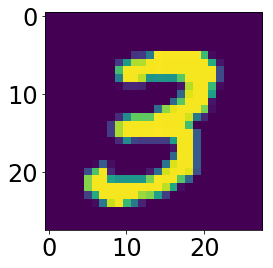

In [26]:
plt.imshow(X_tensor_train[7])
plt.show()

## Определение нейросети

In [27]:
train_loader = DataLoader(dataset = list(zip(X_tensor_train, y_tensor_train),), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = list(zip(X_tensor_test, y_tensor_test)),batch_size=100,shuffle=True)

In [39]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_one,hidden_size_two, num_classes):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size_one)  
        self.relu_1 = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size_one, hidden_size_two)
        self.relu_2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_two, num_classes) 
    
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.relu_1(out)
        out = self.fc2(out)
        out = self.relu_2(out)
        out = self.fc3(out)
        return out

In [40]:
net = Net(input_size, hidden_size_one,hidden_size_two, num_classes)

# Обучение

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


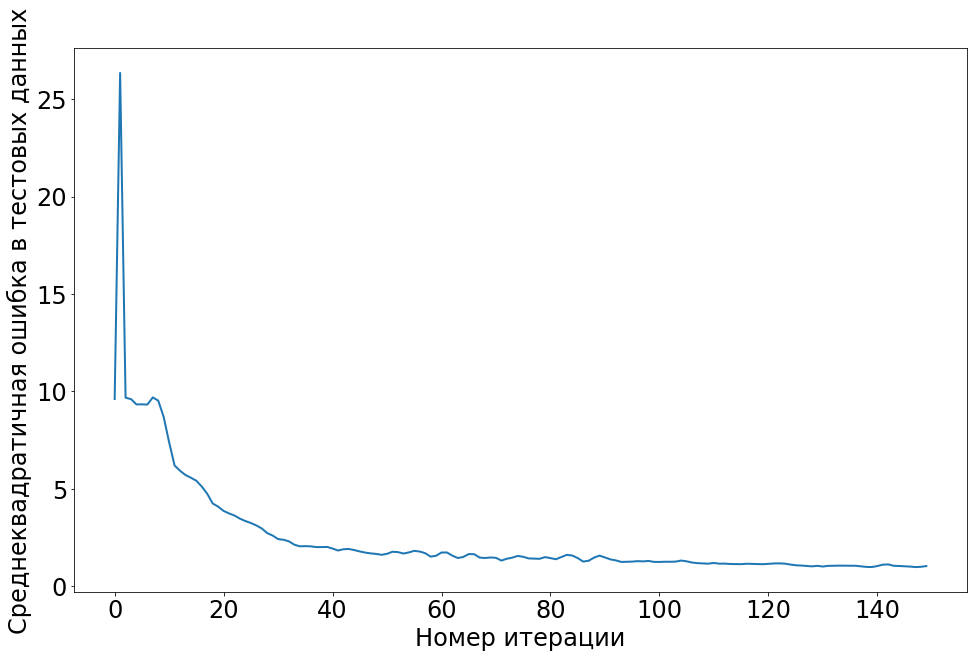

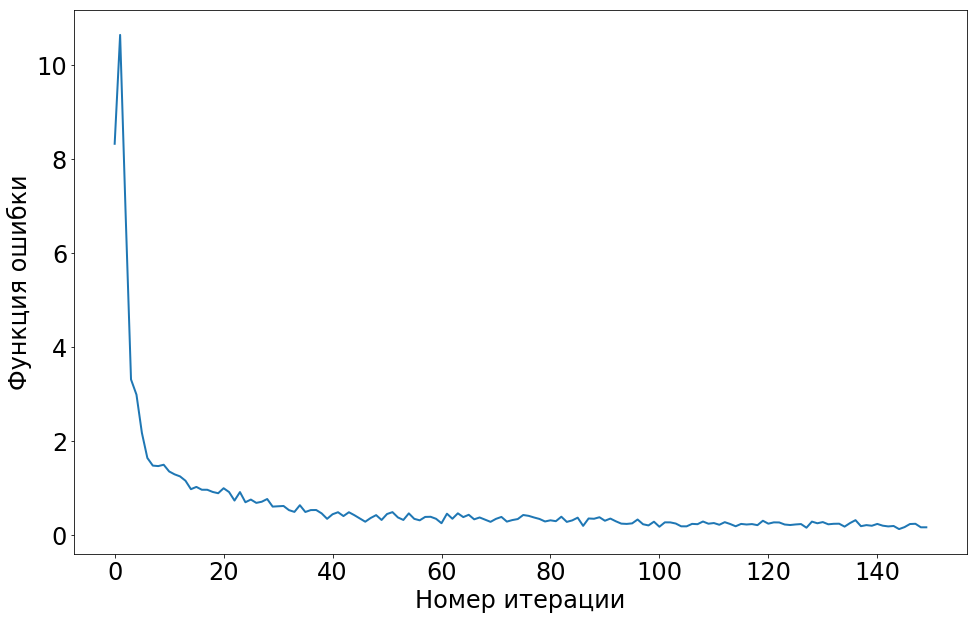

In [30]:
MSE = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

history = np.array([])
errors = np.array([])
for i, (images, labels) in enumerate(train_loader):   
    images = Variable(images.view(-1, 28 * 28))       

    optimizer.zero_grad()                            
    outputs = net(images)                             
    loss = criterion(outputs, labels)                 
    loss.backward()                                   
    optimizer.step()                                  
    history = np.append(history, loss.data.numpy())
    
    error = np.array([])
    for i, (images_test, labels_test) in enumerate(test_loader):
        images_test = Variable(images_test.view(-1, 28 * 28))
        labels_test = Variable(labels_test)
        error = np.append(error, MSE(torch.argmax(net(images_test).data, 1).type(torch.FloatTensor), labels_test.type(torch.FloatTensor)).numpy())
    errors = np.append(errors, np.mean(error))
# Plotting
fig = plt.figure(figsize=(16,10))
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка в тестовых данных')
plt.plot(errors)
plt.show()
fig = plt.figure(figsize=(16,10))
plt.xlabel('Номер итерации')
plt.ylabel('Функция ошибки')
plt.plot(history)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


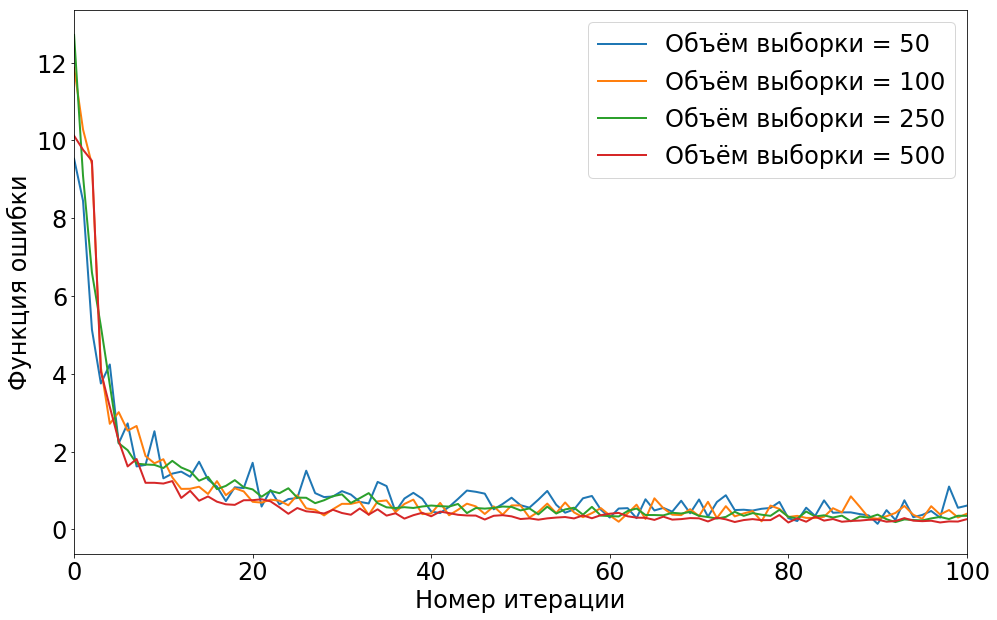

In [37]:
batch_sizes = [50, 100, 250, 500]
fig = plt.figure(figsize=(16,10))
plt.xlabel('Номер итерации')
plt.ylabel('Функция ошибки')
plt.xlim(0, 100)
for batch_size in batch_sizes:
    train_loader = DataLoader(
        dataset = list(zip(X_tensor_train, y_tensor_train)),
        batch_size=batch_size,
        shuffle=True
    )
    net = Net(input_size, hidden_size_one,hidden_size_two, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    history = np.array([])
    for i, (images, labels) in enumerate(train_loader):   
        images = Variable(images.view(-1, 28 * 28))        
        labels = Variable(labels)

        optimizer.zero_grad()                            
        outputs = net(images)                             
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()                                 
        history = np.append(history, loss.data.numpy())
    plt.plot(history, label = 'Объём выборки = %s' % batch_size)
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


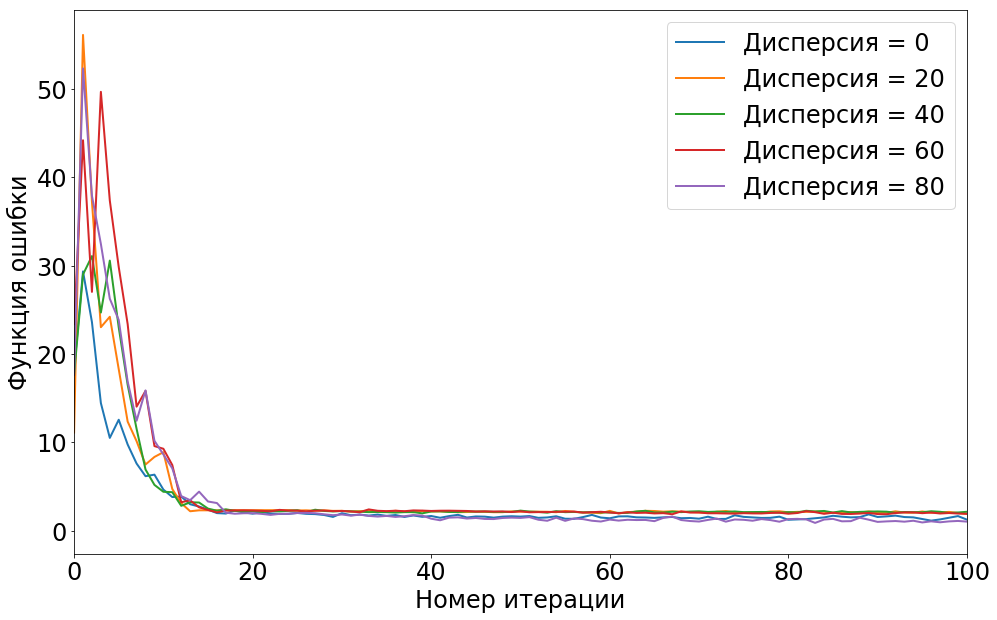

In [38]:
variances = np.arange(0, 100, 20)
fig = plt.figure(figsize=(16,10))
plt.xlabel('Номер итерации')
plt.ylabel('Функция ошибки')
plt.xlim(0, 100)
batch_size = 100

for variance in variances:
    X_tensor_train_noise = torch.FloatTensor(X_train + np.random.normal(np.max(X_train[0]) / 5, variance, X_train[0].shape))
    train_loader = DataLoader(dataset = list(zip(X_tensor_train_noise, y_tensor_train)),batch_size=batch_size,shuffle=True)
    net = Net(input_size, hidden_size_one,hidden_size_two, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    history = np.array([])
    for i, (images, labels) in enumerate(train_loader):   
        images = Variable(images.view(-1, 28 * 28))         
        labels = Variable(labels)

        optimizer.zero_grad()                            
        outputs = net(images)                            
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()                                  
        history = np.append(history, loss.data.numpy())
    plt.plot(history, label = 'Дисперсия = %s' % variance)
plt.legend()
plt.show()

### Вывод
Величина дисперсии шума почти не влияет на скорость обучения